In [1]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import HBox, VBox, interactive
import numpy as np 
import pickle
import plotly.express as px
import matplotlib.colors as mcol
from modules import *
import matplotlib.pyplot as plt

In [2]:
cme = pickle.load(open('pickles/mf_run.p', 'rb'))
print(cme
gridsize = (10,10)

{(8, 11): [array([6.0984175e-06, 8.1272084e-01, 1.8070786e-01, 5.6012282e-03,
       8.0463843e-04, 1.5931857e-04], dtype=float32), 1, 3.077857255935669], (8, 12): [array([4.9570652e-05, 8.9749485e-01, 1.0196305e-01, 3.9133779e-04,
       4.2199616e-05, 5.9027047e-05], dtype=float32), 1, 0.25540176033973694], (9, 12): [array([1.0921511e-04, 8.2830065e-01, 1.7063381e-01, 7.8027730e-04,
       9.9141311e-05, 7.7019009e-05], dtype=float32), 1, 0.11234072595834732], (7, 12): [array([6.9546710e-05, 9.3370497e-01, 6.5670200e-02, 4.3092525e-04,
       4.9933693e-05, 7.4322837e-05], dtype=float32), 1, 0.3700285255908966], (6, 12): [array([7.1800430e-05, 9.6076584e-01, 3.8622718e-02, 4.6950844e-04,
       4.4916953e-05, 2.5347457e-05], dtype=float32), 1, 0.11136267334222794], (10, 12): [array([1.3632391e-04, 5.8665305e-01, 4.1170487e-01, 1.1282868e-03,
       1.5425147e-04, 2.2331347e-04], dtype=float32), 1, 0.058372531086206436], (11, 12): [array([4.8260870e-05, 1.9037026e-01, 8.0896324e-01, 5

In [3]:
policy = []
choice = []
value  = []
coords = np.vstack(cme.keys())
print(coords)
for i in cme.keys():
    policy.append(cme[i][0])
    choice.append(cme[i][1])
    value.append(cme[i][2])

[[ 8 11]
 [ 8 12]
 [ 9 12]
 [ 7 12]
 [ 6 12]
 [10 12]
 [11 12]
 [ 5 12]
 [ 4 12]
 [ 8 13]
 [ 9 13]
 [ 7 13]
 [ 6 13]
 [ 5 13]
 [ 4 13]
 [ 3 13]
 [ 2 13]
 [ 1 13]
 [ 0 13]
 [ 0 14]
 [ 1 14]
 [ 2 14]
 [ 0 15]
 [ 1 15]
 [ 0 16]
 [ 0 17]
 [ 1 17]
 [ 2 17]
 [ 3 17]
 [ 4 17]
 [ 0 18]
 [ 1 18]
 [ 0 19]
 [ 1 19]
 [ 2 19]
 [18 11]
 [19 11]
 [19 12]
 [18 12]
 [17 12]
 [16 12]
 [15 12]
 [14 12]
 [13 12]
 [12 12]
 [ 3 12]
 [ 2 12]
 [ 1 12]
 [ 0 12]
 [ 3 14]
 [ 2 15]
 [ 3 15]
 [14  7]
 [13  7]
 [13  8]
 [12  8]
 [12  9]
 [11  9]
 [10  9]
 [ 9  9]
 [ 9 10]
 [10 10]
 [ 5 17]
 [ 7 15]
 [ 6 15]
 [ 5 15]
 [ 4 15]
 [ 1 16]
 [ 2 16]
 [13  5]
 [12  5]
 [12  6]
 [12  7]
 [11  8]
 [11 10]
 [10 16]
 [ 9 16]
 [ 8 16]
 [ 7 16]
 [ 6 16]
 [ 5 16]
 [ 4 16]
 [ 3 16]
 [ 5  4]
 [ 5  5]
 [ 6  5]
 [ 6  6]
 [ 6  7]
 [ 7  7]
 [ 7  8]
 [ 8  8]
 [ 8  9]
 [ 1  8]
 [ 0  8]
 [ 2  8]
 [ 3  8]
 [ 4  8]
 [ 5  8]
 [ 5  9]
 [ 6  9]
 [ 7  9]
 [17 17]
 [16 17]
 [15 17]
 [14 17]
 [13 17]
 [12 17]
 [11 17]
 [10 17]
 [ 9 17]
 [ 8 17]
 

/home/annik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



In [ ]:
fig = go.FigureWidget(
    data = go.Scatter(x = coords[:,0], y=coords[:,1], 
                      mode='markers', 
                      marker =dict(size =10, 
                                   color=value, 
                                   colorbar = dict(title="Value"), 
                                   colorscale="Viridis")))
fig.update_xaxes(range=[-0.5,gridsize[0]-0.5], tickvals = list(np.arange(gridsize[0])))
fig.update_yaxes(range=[-0.5,gridsize[1]-0.5], tickvals = list(np.arange(gridsize[1])))

fig.data[0].text = value
fig.data[0].hoverinfo = 'text'

fig.show()

In [ ]:
def set_opacity(opacity, size):
    fig.data[0].marker.opacity = opacity
    fig.data[0].marker.size = size
opacity_slider = interactive(set_opacity,
                            opacity = (0.0, 1.0, 0.01),
                            size = (1,10,0.25))
opacity_slider.children[0].layout.width = '400px'
opacity_slider.children[1].layout.width = '400px'

#opacity_slider
HBox([opacity_slider, fig])
import plotly
plotly.offline.iplot(fig, opacity_slider)

In [4]:
#trunc = pickle.load(open('miniexpt.p', 'rb'))
#long = pickle.load(open('miniexpt.p', 'rb'))
test = pickle.load(open('pickles/initial_training.p', 'rb'))

In [32]:



print(len(trunc))


wo_pen = trunc[0]
w_pen = trunc[1]

2


Text(0.5, 0.98, 'Truncated Trials')

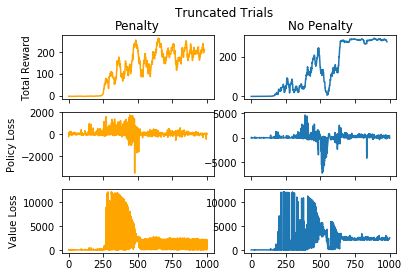

In [31]:
colors = ['tab:blue', 'orange', 'darkgreen']
f, ax = plt.subplots(3,2, sharex=True)

ax[0,0].plot(gp.running_mean(np.asarray(wo_pen[0]), 20), color=colors[1])
ax[0,0].set_ylabel('Total Reward')
ax[0,0].set_title('Penalty')
#ax[0,0].set_ylim([-5,1])

ax[0,1].plot(gp.running_mean(np.asarray(w_pen[0]), 20), color=colors[0])
ax[0,1].set_title('No Penalty')
#ax[0,1].set_ylim([-5,1])

ax[1,0].plot(wo_pen[1][0], color=colors[1])
ax[1,0].set_ylabel('Policy Loss')

ax[1,1].plot(w_pen[1][0], color=colors[0])

ax[2,0].plot(wo_pen[1][1], color=colors[1])
ax[2,0].set_ylabel('Value Loss')

ax[2,1].plot(w_pen[1][1], color=colors[0])
plt.suptitle('Truncated Trials')

In [ ]:
eop = pickle.load(open('pickles/effect_of_penalization_on_learning.p', 'rb'))
full = eop[0]
short = eop[1]

f_ = np.asarray(full)
s_ = np.asarray(short)

smoothing = 20
full_non = gp.running_mean(np.mean(f_[0],axis=0), smoothing)
full_pen = gp.running_mean(np.mean(f_[1],axis=0), smoothing)

shrt_non = gp.running_mean(np.mean(s_[0],axis=0), smoothing)
shrt_pen = gp.running_mean(np.mean(s_[1],axis=0), smoothing)


fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(full_non, label='non')
ax[0].plot(full_pen, label='pen')

ax[1].plot(shrt_non)
ax[1].plot(shrt_pen)

ax[0].legend(bbox_to_anchor=(0.85, 0.5))

va, pa = ac.snapshot(maze,run_dict['agent'])
reload(gp)
gp.plot_valmap(maze,va)
gp.plot_polmap(maze,pa)